### Preamble ###

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mc

from matplotlib.patches import Circle
import matplotlib.patches as patches

from arepy.read_write import binary_read as rsnap
from arepy.read_write import binary_write as wsnap
from arepy.utility import cgs_constants as cgs
from arepy.utility import snap_utility as sutil

#NEW utils functions! 
import arepy.utils as utils

from scipy.interpolate import NearestNDInterpolator
from numpy import uint32, uint64, float64, float32
import math

from scipy import signal
from scipy import ndimage

import pandas as pd

########### GENERAL STUFF  ##########

#internal arepo units in cgs
ulength = 3.0856e20
umass = 1.991e33
uvel = 1.0e5

utime = ulength/uvel
udensity = umass/ulength/ulength/ulength
uenergy= umass*uvel*uvel
ucolumn = umass/ulength/ulength
umag = umass**0.5 / ulength**1.5 * uvel

uMyr=utime/(60.*60.*24.*365.25*1.e6)

uparsec=ulength/3.0856e18

### Define Kwargs ###

In [2]:
# key word arguments

kwargs = {
    # center 
    'center':[500,500,500],

    # cutting data to disc
    'cut_R_inner':0 ,
    'cut_R_outer':100, #for code unit 100pc, 100 here = 10kpc
    'cut_z':5,
    
    #NL97
    'xHe':0.1,
    'mp':1.6726231e-24,
    'kb':1.3806485e-16,

    #star fomration efficiency
    'SFE':0.05}   #CHANGE SFE FROM 5% to 10% IF YOU'RE LOOKING AT SMALLER SINKS!!!! 


#xHe=0.1, mp = 1.6726231e-24, kb = 1.3806485e-16,

## Choose species for HRO analysis ##

In [3]:
# Options are 'Total', 'Hp', 'H2', and 'HI' 
HRO_species = 'Hp'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## Choose what's being saved ##

In [4]:
SAVE_HRO_RESULTS = True

## Set bases for data load-in ##

In [5]:
########## set path of snapshot data and snap number ##########

#snap_base = '/cosma7/data/dp058/dc-bogu1/UPDATED_BRANCH/MHD_SIMS/NEW_SINKS_NO_T/snapshots/'
#snap_base = '/cosma8/data/dp058/dc-bogu1/MHD_SIMS/HIGHER_RES_SINK_ACC_STOP/snapshots/'

snap_base = '/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/'

number = 189
#number = 205
#number = 244

filenum=str(number).zfill(3)

########## set path of equivalent grid data ##########

#grid_base = '/cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/FIRST_TEST/'

#grid_base = '/cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/2pc_100Myr/'
#grid_base = '/cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/HR_100Myr/'

#grid_base = '/cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/2pc_120Myr/'
#grid_base = '/cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/HR_120Myr/'

grid_base = '/cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/'

# Single Tile Procedure #

In [6]:
#set coordinates for selected tile (in kpc)
tile_x = [-5,-3]
tile_y = [-5,-3]
cut_z = [-0.5,0.5] 

grid_origin_coords = '-5_-5'

#define tile parameters
tile_xy_size = 20 #in code units, i.e tile_xy_size=25 means 25 * 100 pc = 2500pc (2.5kpc)
tile_z_size = 10
tile_volume = (tile_xy_size**2) * tile_z_size

## Load Snapshot And Compute Key Parameters ##

In [7]:
########## loading data and selecting tile ########## 

filenum = str(number).zfill(3)

#load data with my function
total_mass, total_pos, total_rho, total_bfield, total_yn, total_T, total_vels, total_chem, total_time = utils.load_snap_data(base=snap_base, filenum=filenum, **kwargs)

loading data from; /cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
using xHe =  0.1


In [8]:
########## cut snapshot data to just the tile region ########## 

# define iextract for the specific tile 
total_pos_kpc = (total_pos - 500) / 10. #convert positions to kpc space

tile_extract = np.where((total_pos_kpc[:,0] > tile_x[0]) & (total_pos_kpc[:,0] < tile_x[1]) \
                        & (total_pos_kpc[:,1] > tile_y[0]) & (total_pos_kpc[:,1] < tile_y[1]) \
                        & (total_pos_kpc[:,2] > cut_z[0]) & (total_pos_kpc[:,2] < cut_z[1]))
        
tile1_mass = total_mass[tile_extract]
tile1_pos = total_pos[tile_extract]
tile1_pos_kpc = (tile1_pos - 500) / 10. #convert positions to kpc space
tile1_rho = total_rho[tile_extract]
tile1_bfield = total_bfield[tile_extract]
tile1_yn = total_yn[tile_extract]
tile1_T = total_T[tile_extract]
tile1_vels = total_vels[tile_extract]
tile1_chem = total_chem[tile_extract]

In [9]:
########## compute values for catalogue ##########

################ standard 3D values from snapshot data ################

#densities
tile1_rho_cgs_global = (np.sum(tile1_mass) / tile_volume) * udensity #in gcm^-3
tile1_rho_cgs_median = np.median(tile1_rho * udensity) #in gcm^-3

#median field strength
tile1_abs_bfield_median = np.median(np.sqrt(tile1_bfield[:,0]**2 + tile1_bfield[:,1]**2 + tile1_bfield[:,2]**2)) * umag *  1e6 #in microG

#median temp
tile1_T_median = np.median(tile1_T) #in Kelvin

#chemical abundances
tile1_xH2, tile1_xHp, tile1_xCO = tile1_chem.T
tile1_xHI = 1 - tile1_xHp - 2*tile1_xH2    #abundance of HI from conservation laws
#compute averages etc here if want to inlcude chemical data in catalogue

################ 2D values from binning snapshot data ################

# Define spatial bins for gas SD and SF SD calculations
x_bins = np.linspace(tile_x[0], tile_x[1], num=5)  # Adjust the number of bins as needed
y_bins = np.linspace(tile_y[0], tile_y[1], num=5)  

#mean gas SD
tile1_gas_surface_density_global = np.sum(tile1_mass) / ((tile_xy_size*100)**2) #for surface density (not volume density) in solar mases per sq pc
tile1_gas_surface_density = utils.calculate_gas_surface_density(tile1_pos_kpc, tile1_mass, x_bins, y_bins) #in solar mases per sq pc
tile1_gas_surface_density_median = np.median(tile1_gas_surface_density)

#SFR SD
total_SFR_with_pos = utils.calculate_sfr_with_pos(snap_base, number, young_sinks_only=False, **kwargs)
#total_SFR_surface_density = utils.calculate_sfr_surface_density(total_SFRs, total_SFR_positions, x_bins, y_bins) #in solar mases per yr per sq kpc 

tile_SFR_extract = np.where((total_SFR_with_pos[:,1] > tile_x[0]) & (total_SFR_with_pos[:,1] < tile_x[1]) \
                        & (total_SFR_with_pos[:,2] > tile_y[0]) & (total_SFR_with_pos[:,2] < tile_y[1]) \
                        & (total_SFR_with_pos[:,3] > cut_z[0]) & (total_SFR_with_pos[:,3] < cut_z[1]))

tile_SFR_with_pos = total_SFR_with_pos[tile_SFR_extract]

tile1_SFR_surface_density = utils.calculate_sfr_surface_density(tile_SFR_with_pos, x_bins, y_bins) #in solar mases per yr per sq kpc 
tile1_SFR_surface_density_median = np.median(tile1_SFR_surface_density)

/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5


In [10]:
########## create catalogue using pandas dataframe ##########

# define data
dataframe = {
    'Region': ['Region1'],
    'Total Volume Density [$gcm^{-3}$]': [tile1_rho_cgs_global],
    'Median Volume Density [$gcm^{-3}$]': [tile1_rho_cgs_median],
    'Median Magnetic Field Strength [$\mu G$]': [tile1_abs_bfield_median],
    'Median Temperature [$K$]':[tile1_T_median],
    'Total Gas Surface Density [$M_\odot pc^{-2}$]':[tile1_gas_surface_density_global],
    'Median Gas Surface Density [$M_\odot pc^{-2}$]':[tile1_gas_surface_density_median],
    'Median SFR Surface Density [$M_\odot yr^{-1} kpc^{-2}$]':[tile1_SFR_surface_density_median]
    # Add more columns as needed
}

# define the order of columns
column_order = [
    'Region',
    'Total Volume Density [$gcm^{-3}$]',
    'Median Volume Density [$gcm^{-3}$]',
    'Median Magnetic Field Strength [$\mu G$]',
    'Median Temperature [$K$]',
    'Total Gas Surface Density [$M_\odot pc^{-2}$]',
    'Median Gas Surface Density [$M_\odot pc^{-2}$]',
    'Median SFR Surface Density [$M_\odot yr^{-1} kpc^{-2}$]'
    # Add more columns as needed
]

# create a DataFrame
catalog_df = pd.DataFrame(dataframe, columns=column_order)

# display the DataFrame
catalog_df

,Region,Total Volume Density [$gcm^{-3}$],Median Volume Density [$gcm^{-3}$],Median Magnetic Field Strength [$\mu G$],Median Temperature [$K$],Total Gas Surface Density [$M_\odot pc^{-2}$],Median Gas Surface Density [$M_\odot pc^{-2}$],Median SFR Surface Density [$M_\odot yr^{-1} kpc^{-2}$]
0,Region1,1.803023e-25,1.952997e-25,0.023109,7624.914442,2.660412,2.694928,0.0


## Compute HRO and Add To The Catalogue ##

In [11]:
# add hro path

import sys
sys.path.append('/cosma/home/dp058/dc-bogu1/notebooks/magnetar')
#then do; 
from hro3D import *

In [12]:
########## only load grids for chosen chemical species##########

##### total gas ##### 

if HRO_species=='Total': 
    dens_grid = rsnap.read_grid(grid_base + 'tile_grids/density_grid_' + grid_origin_coords)
    
    rho_cgs_grid = dens_grid * udensity    #convert to cgs units
    xHe=0.1
    mp = 1.6726231e-24
    yn_grid = rho_cgs_grid/((1. + 4.0 * xHe) * mp)  #this is the number density grid
    
    yn_grid[yn_grid < 0] = 0 # remove negative values for yn grid, set them to zero
    
##### Hp #####

if HRO_species=='Hp':
    dens_grid = rsnap.read_grid(grid_base + 'tile_grids/density_grid_' + grid_origin_coords)
    
    xHp_grid = rsnap.read_grid(grid_base + 'tile_grids/xHP_grid_' + grid_origin_coords)
    
    #calculate yn grid to multiply by abundance
    rho_cgs_grid = dens_grid * udensity    #convert to cgs units
    xHe=0.1
    mp = 1.6726231e-24
    yn_grid = rho_cgs_grid/((1. + 4.0 * xHe) * mp)  #this is the number density grid
    
    # Calculate HI grid with yn and xHI
    Hp_grid = yn_grid * xHp_grid
    
    Hp_grid[Hp_grid < 0] = 0  # remove negative values for HI grid, set them to zero

##### H2 #####    

if HRO_species=='H2':
    dens_grid = rsnap.read_grid(grid_base + 'tile_grids/density_grid_' + grid_origin_coords)
    
    xH2_grid = rsnap.read_grid(grid_base + 'tile_grids/xH2_grid_' + grid_origin_coords)
    
    #calculate yn grid to multiply by abundance
    rho_cgs_grid = dens_grid * udensity    #convert to cgs units
    xHe=0.1
    mp = 1.6726231e-24
    yn_grid = rho_cgs_grid/((1. + 4.0 * xHe) * mp)  #this is the number density grid
    
    # Calculate HI grid with yn and xHI
    H2_grid = yn_grid * xH2_grid
    
    H2_grid[H2_grid < 0] = 0  # remove negative values for HI grid, set them to zero
    
##### HI #####
    
if HRO_species=='HI': 
    dens_grid = rsnap.read_grid(grid_base + 'tile_grids/density_grid_' + grid_origin_coords)
    
    xHp_grid = rsnap.read_grid(grid_base + 'tile_grids/xHP_grid_' + grid_origin_coords)
    xH2_grid = rsnap.read_grid(grid_base + 'tile_grids/xH2_grid_' + grid_origin_coords)
    
    xHI_grid = 1 - xHp_grid - 2*xH2_grid
    
    #calculate yn grid to multiply by abundance
    rho_cgs_grid = dens_grid * udensity    #convert to cgs units
    xHe=0.1
    mp = 1.6726231e-24
    yn_grid = rho_cgs_grid/((1. + 4.0 * xHe) * mp)  #this is the number density grid
    
    # Calculate HI grid with yn and xHI
    HI_grid = yn_grid * xHI_grid
    
    HI_grid[HI_grid < 0] = 0  # remove negative values for HI grid, set them to zero

########## load magnetic field grid data ##########

magnetic_grid = rsnap.read_vector_grid(grid_base + 'tile_grids/magnetic_grid_' + grid_origin_coords)

Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/density_grid_-5_-5
[1000] [1000] [1000]
1000
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/xHP_grid_-5_-5
[1000] [1000] [1000]
1000
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/xH2_grid_-5_-5
[1000] [1000] [1000]
1000
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/magnetic_grid_-5_-5
[1000] [1000] [1000]
1000


In [13]:
########## cut grids to correct z extent and run my hro function ########## 

#magnetic field cut
magnetic_grid_cut = magnetic_grid[:, :, 250:750, :]

Bx = magnetic_grid_cut[:,:,:,0]
By = magnetic_grid_cut[:,:,:,1]
Bz = magnetic_grid_cut[:,:,:,2]

##### total gas ##### 

if HRO_species=='Total': 
    yn_grid_cut = yn_grid[:, :, 250:750]
    
    hros, bin_edges, cdens, xi, cosphi, bin_pop = kammy_hro3D(yn_grid_cut, Bx, By, Bz, hsize=21, mind=1, outh=[0,1,2], pxksz=5, plotting=False) 

##### Hp #####

if HRO_species=='Hp':
    Hp_grid_cut = Hp_grid[:, :, 250:750]
    
    hros_Hp, bin_edges_Hp, cdens_Hp, xi_Hp, cosphi_Hp, bin_pop_Hp = kammy_hro3D(Hp_grid_cut, Bx, By, Bz, hsize=21, mind=1, outh=[0,1,2], pxksz=5, plotting=False)

##### H2 #####  

if HRO_species=='H2':
    H2_grid_cut = H2_grid[:, :, 250:750]
    
    hros_H2, bin_edges_H2, cdens_H2, xi_H2, cosphi_H2, bin_pop_H2 = kammy_hro3D(H2_grid_cut, Bx, By, Bz, hsize=21, mind=1, outh=[0,1,2], pxksz=5, plotting=False)
    
##### HI #####
    
if HRO_species=='HI': 
    HI_grid_cut = HI_grid[:, :, 250:750]
    
    hros_HI, bin_edges_HI, cdens_HI, xi_HI, cosphi_HI, bin_pop_HI = kammy_hro3D(HI_grid_cut, Bx, By, Bz, hsize=21, mind=1, outh=[0,1,2], pxksz=5, plotting=False)  

/cosma/home/dp058/dc-bogu1/notebooks/magnetar/hro3D.py:71: RuntimeWarning: divide by zero encountered in true_divide
  cosphi=dot/(normgrad*normb)
/cosma/home/dp058/dc-bogu1/notebooks/magnetar/hro3D.py:71: RuntimeWarning: invalid value encountered in true_divide
  cosphi=dot/(normgrad*normb)


In [14]:
if HRO_species=='Total': 
    outputs_dict = {
        'hros': hros,
        'bin_edges': bin_edges,
        'cdens': cdens,
        'xi': xi,
        'cosphi': cosphi,
        'yn_grid': yn_grid
    }

In [15]:
########## add HRO result to catalogue ########## 

#add to the dataframe
catalog_df['Xi 1 - 10'] = outputs_dict['xi'][0]
catalog_df['Xi 10 - 100'] = outputs_dict['xi'][1]
catalog_df['Xi 100 - 800'] = outputs_dict['xi'][2]

NameError: name 'outputs_dict' is not defined

In [ ]:
catalog_df

### Single Tile Quick Visualisations ###

In [ ]:
########## plot the xi change ########## 

##### total gas ##### 

if HRO_species=='Total': 
    utils.HRO_xi_plot(cdens, xi, color='blue')

##### Hp #####

if HRO_species=='Hp':
    utils.HRO_xi_plot(cdens_Hp, xi_Hp, color='purple')
    
##### H2 #####  

if HRO_species=='H2':
    utils.HRO_xi_plot(cdens_H2, xi_H2, color='green')
    
##### HI #####
    
if HRO_species=='HI': 
    utils.HRO_xi_plot(cdens_HI, xi_HI, color='orange')

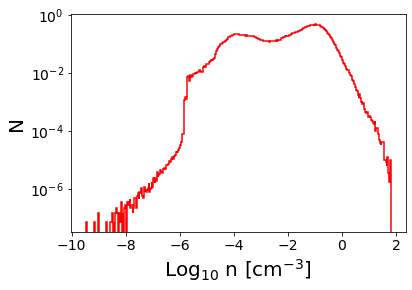

In [19]:
########## check number density distribution from which bins are being defined ########## 

#only want non-zero values for plot
yn_flat = yn_grid_cut.flatten()
yn_for_pdf = yn_flat[yn_flat != 0]

fig, ax = plt.subplots()
plt.hist(np.log10(yn_for_pdf), bins=400, density=True,
         histtype='step', linewidth=1.5, color = 'red', log=True) #weights=mass,

plt.xlabel('Log$_{10}$ n [cm$^{-3}$]', fontsize=20)
plt.ylabel('N', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tick_params(axis='both', labelsize=14)

# Multiple Tiles Procedure #

## Compute Key Parameters for All Regions ##

In [11]:
########## loading data and defining tiles ########## 

filenum = str(number).zfill(3)

#load data with my function
snap_data = utils.load_snap_data(base=snap_base, filenum=filenum, **kwargs)

# Define the list of tile_params for the different regions, by defining the range and step in kpc
tiles_min_xy = -5
tiles_max_xy = 5
tile_size_xy = 2

x_ranges = [[tiles_min_xy + i*tile_size_xy, tiles_min_xy + (i+1)*tile_size_xy] for i in range(int((tiles_max_xy-tiles_min_xy)/tile_size_xy))]
y_ranges = [[tiles_min_xy + i*tile_size_xy, tiles_min_xy + (i+1)*tile_size_xy] for i in range(int((tiles_max_xy-tiles_min_xy)/tile_size_xy))]
z_ranges = [[-0.5, 0.5]]  # Constant z coordinates

# Generate tile_params
tile_params_list = [(x, y, z) for x in x_ranges for y in y_ranges for z in z_ranges]
#print(tile_params_list)

loading data from; /cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
using xHe =  0.1


In [12]:
########## copute key parameters for all regions and store results ########## 

# Create an empty list to store the results
results_list = []

# Loop over each set of tile_params and call the function
for i, tile_params in enumerate(tile_params_list, start=1):
    # Call the function for each region
    result = utils.compute_parameters_for_region(snap_base, number, snap_data, tile_params, **kwargs)
    # Append the result to the list of results
    results_list.append(result)
    #print iteration to know progress of loop
    print(i)

/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
1
/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
2
/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
3
/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
4
/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
5
/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
6
/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
7
/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
8
/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
9
/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
10
/cosma8/data/dp058/dc-bogu1/MHD_SIMS/JEANS_ON_FIX/JEANS_FIX_2pc/snapshots/snap_189.hdf5
11
/cosma8/

In [13]:
########## create catalogue and display ########## 

# Define the column names for the DataFrame
column_names = [
    'Bottom-Left Coordinate [$kpc$]',
    'Total Volume Density [$gcm^{-3}$]',
    'Median Volume Density [$gcm^{-3}$]',
    'Median Magnetic Field Strength [$\mu G$]',
    'Median Temperature [$K$]',
    'Total Gas Surface Density [$M_\odot pc^{-2}$]',
    'Median Gas Surface Density [$M_\odot pc^{-2}$]',
    'Median SFR Surface Density [$M_\odot yr^{-1} kpc^{-2}$]'
]

# Create the DataFrame from the list of results
catalogue_df = pd.DataFrame(results_list, columns=column_names)

# Display the DataFrame
catalogue_df

,Bottom-Left Coordinate [$kpc$],Total Volume Density [$gcm^{-3}$],Median Volume Density [$gcm^{-3}$],Median Magnetic Field Strength [$\mu G$],Median Temperature [$K$],Total Gas Surface Density [$M_\odot pc^{-2}$],Median Gas Surface Density [$M_\odot pc^{-2}$],Median SFR Surface Density [$M_\odot yr^{-1} kpc^{-2}$]
0,"(-5, -5)",1.803023e-25,1.952997e-25,0.023109,7624.914442,2.660412,2.694928,0.000000
1,"(-5, -3)",5.476446e-25,6.862427e-23,4.153341,65.866656,8.080652,6.662178,0.000000
2,"(-5, -1)",6.073620e-25,2.187612e-22,8.649555,36.414257,8.961800,5.669970,0.000000
3,"(-5, 1)",4.629210e-25,2.487650e-23,0.929558,131.560690,6.830532,6.183083,0.000000
4,"(-5, 3)",2.185696e-25,1.914256e-25,0.029811,7533.022435,3.225057,3.032279,0.000000
5,"(-3, -5)",5.084726e-25,1.310370e-23,0.586653,206.445445,7.502659,5.629082,0.000000
6,"(-3, -3)",1.228123e-24,2.817980e-22,16.453091,35.633735,18.121308,17.969913,0.013867
7,"(-3, -1)",2.315719e-24,4.482290e-22,45.913426,41.341403,34.169100,28.344136,0.069840
8,"(-3, 1)",1.402107e-24,3.605494e-22,22.042930,37.830701,20.688484,16.136679,0.005286
9,"(-3, 3)",4.982004e-25,4.422486e-24,0.219224,541.759679,7.351089,7.127023,0.000000


## Load Multiple Tile Grids And Compute HRO For All ##

In [14]:
# add hro path

import sys
sys.path.append('/cosma/home/dp058/dc-bogu1/notebooks/magnetar')
#then do; 
from hro3D import *

In [15]:
import pickle

In [16]:
# Check if HRO results should be saved
if SAVE_HRO_RESULTS==True:
    if HRO_species == 'Total':
        outputs_dict = utils.compute_hro_outputs(grid_base, catalogue_df, udensity, rsnap, HRO_species)
        output_file = grid_base + 'total_gas_hro_grid_outputs.pkl'
    elif HRO_species == 'Hp':
        outputs_dict = utils.compute_hro_outputs(grid_base, catalogue_df, udensity, rsnap, HRO_species)
        output_file = grid_base + 'Hp_hro_grid_outputs.pkl'
    elif HRO_species == 'H2':
        outputs_dict = utils.compute_hro_outputs(grid_base, catalogue_df, udensity, rsnap, HRO_species)
        output_file = grid_base + 'H2_hro_grid_outputs.pkl'
    elif HRO_species == 'HI':
        outputs_dict = utils.compute_hro_outputs(grid_base, catalogue_df, udensity, rsnap, HRO_species)
        output_file = grid_base + 'HI_hro_grid_outputs.pkl'

Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/density_grid_-5_-5
[1000] [1000] [1000]
1000
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/xHP_grid_-5_-5
[1000] [1000] [1000]
1000
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/magnetic_grid_-5_-5
[1000] [1000] [1000]
1000


/cosma/home/dp058/dc-bogu1/notebooks/magnetar/hro3D.py:264: RuntimeWarning: invalid value encountered in true_divide
  hist_normalized = hist / (len(cosphi[good]) * bin_width) #normalising by area?
/cosma/home/dp058/dc-bogu1/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/cosma/home/dp058/dc-bogu1/.local/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


(-5, -5)
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/density_grid_-5_-3
[1000] [1000] [1000]
1000
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/xHP_grid_-5_-3
[1000] [1000] [1000]
1000
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/magnetic_grid_-5_-3
[1000] [1000] [1000]
1000
(-5, -3)
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/density_grid_-5_-1
[1000] [1000] [1000]
1000
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/xHP_grid_-5_-1
[1000] [1000] [1000]
1000
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/magnetic_grid_-5_-1
[1000] [1000] [1000]
1000
(-5, -1)
Loading file /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/tile_grids/density_grid_-5_1
[1000] [1000] [1000]
1000
Loading file /

In [17]:
output_file

'/cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/Hp_hro_grid_outputs.pkl'

In [18]:
if SAVE_HRO_RESULTS==True:
    # Save outputs_dict
    with open(output_file, "wb") as f:
        pickle.dump(outputs_dict, f)
    print("Outputs saved to:", output_file)
else:
    print('HRO analysis not requested. Check if results have already been generated and saved, then load them in if so.')

Outputs saved to: /cosma8/data/dp058/dc-bogu1/MHD_SIMS/GRID_TILE_MAKER/JEANS_FIX_90Myr/Hp_hro_grid_outputs.pkl


In [19]:
def load_hro_results(species, grid_base):
    with open(f'{grid_base}{species}_hro_grid_outputs.pkl', 'rb') as f:
        outputs_dict = pickle.load(f)
    print('HRO results loaded')
    return outputs_dict

if SAVE_HRO_RESULTS==False and HRO_species=='Total':
    outputs_dict = load_hro_results('Total_gas', grid_base)
    
if SAVE_HRO_RESULTS==False and HRO_species=='Hp':
    outputs_dict = load_hro_results('Hp', grid_base)
    
if SAVE_HRO_RESULTS==False and HRO_species=='H2':
    outputs_dict = load_hro_results('H2', grid_base)
    
if SAVE_HRO_RESULTS==False and HRO_species=='HI':
    outputs_dict = load_hro_results('HI', grid_base)

In [ ]:
########## load in result of HRO (don't need to re-run above) ########## 

if SAVE_HRO_RESULTS==False and HRO_species=='Total': #assuming if data isn't being saved then it is being loaded in
    import pickle
    
    # Load the pickled file into a dictionary
    with open(grid_base + 'Total_gas_hro_grid_outputs.pkl', 'rb') as f:
        outputs_dict = pickle.load(f)

    # outputs_dict contains outputs of HRO
    print('HRO results loaded')

In [ ]:
########## load in result of HRO (don't need to re-run above) ########## 

if SAVE_HRO_RESULTS==False and HRO_species=='Hp': #assuming if data isn't being saved then it is being loaded in
    import pickle
    
    # Load the pickled file into a dictionary
    with open(grid_base + 'Hp_hro_grid_outputs.pkl', 'rb') as f:
        outputs_dict = pickle.load(f)

    # outputs_dict contains outputs of HRO
    print('HRO results loaded')

In [ ]:
########## load in result of HRO (don't need to re-run above) ########## 

if SAVE_HRO_RESULTS==False and HRO_species=='H2': #assuming if data isn't being saved then it is being loaded in
    import pickle
    
    # Load the pickled file into a dictionary
    with open(grid_base + 'H2_hro_grid_outputs.pkl', 'rb') as f:
        outputs_dict = pickle.load(f)

    # outputs_dict contains outputs of HRO
    print('HRO results loaded')

In [ ]:
########## load in result of HRO (don't need to re-run above) ########## 

if SAVE_HRO_RESULTS==False and HRO_species=='HI': #assuming if data isn't being saved then it is being loaded in
    import pickle
    
    # Load the pickled file into a dictionary
    with open(grid_base + 'HI_hro_grid_outputs.pkl', 'rb') as f:
        outputs_dict = pickle.load(f)

    # outputs_dict contains outputs of HRO
    print('HRO results loaded')

## Add HRO Results To Catalogue, Then Save ##

In [ ]:
'''
def save_catalogue_data(df, species, outputs_dict, grid_base):
    df[f'HRO Xi 1 - 10 ({species})'] = outputs_dict[f'{species}_xi'][0]
    df[f'HRO Xi 10 - 100 ({species})'] = outputs_dict[f'{species}_xi'][1]
    df[f'HRO Xi 100 - 800 ({species})'] = outputs_dict[f'{species}_xi'][2]
    df.to_csv(f'{grid_base}/{species}_all_tiles_data_catalogue.csv', index=False)

if HRO_species == 'Total':
    save_catalogue_data(catalog_df, 'Total Gas', total_gas_outputs_dict, grid_base)

if HRO_species == 'Hp':
    save_catalogue_data(catalog_df, 'Hp', Hp_outputs_dict, grid_base)

if HRO_species == 'H2':
    save_catalogue_data(catalog_df, 'H2', H2_outputs_dict, grid_base)

if HRO_species == 'HI':
    save_catalogue_data(catalog_df, 'HI', HI_outputs_dict, grid_base)
'''

In [ ]:
########## Add Xi values to the DataFrame, then save ##########

##### total gas ##### 

if HRO_species=='Total': 
    if SAVE_CATALOGUE==True:
    catalog_df['HRO Xi 1- 10 (Total Gas)'] = total_gas_outputs_dict['xi'][0]
    catalog_df['HRO Xi 10 - 100 (Total Gas)'] = total_gas_outputs_dict['xi'][1]
    catalog_df['HRO Xi 100 - 800 (Total Gas)'] = total_gas_outputs_dict['xi'][2]
    
    #catalogue_df.to_csv(grid_base + '/Total_gas_all_tiles_data_catalogue.csv', index=False)

##### Hp #####

if HRO_species=='Hp':
    if SAVE_CATALOGUE==True:
    catalog_df['HRO Xi 1 - 10 (Hp)'] = Hp_outputs_dict['Hp_xi'][0]
    catalog_df['HRO Xi 10 - 100 (Hp)'] = Hp_outputs_dict['Hp_xi'][1]
    catalog_df['HRO Xi 100 - 800 (Hp)'] = Hp_outputs_dict['Hp_xi'][2]
    
    #catalogue_df.to_csv(grid_base + '/Hp_all_tiles_data_catalogue.csv', index=False)
    
##### H2 #####  

if HRO_species=='H2':
    if SAVE_CATALOGUE==True:
    catalog_df['HRO Xi 1 - 10 (H2)'] = H2_outputs_dict['H2_xi'][0]
    catalog_df['HRO Xi 10 - 100 (H2)'] = H2_outputs_dict['H2_xi'][1]
    catalog_df['HRO Xi 100 - 800(H2)'] = H2_outputs_dict['H2_xi'][2]
    
    #catalogue_df.to_csv(grid_base + '/H2_all_tiles_data_catalogue.csv', index=False)
    
##### HI #####
    
if HRO_species=='HI': 
    if SAVE_CATALOGUE==True:
    catalog_df['HRO Xi 1 - 10 (HI)'] = HI_outputs_dict['HI_xi'][0]
    catalog_df['HRO Xi 10 - 100 (HI)'] = HI_outputs_dict['HI_xi'][1]
    catalog_df['HRO Xi 100 - 800 (HI)'] = HI_outputs_dict['HI_xi'][2]
    
    #catalogue_df.to_csv(grid_base + '/HI_all_tiles_data_catalogue.csv', index=False)


In [ ]:
# Load the CSV file into a DataFrame
if SAVE_CATALOGUE==False:
    catalogue_df = pd.read_csv(grid_base + '/all_tiles_data_catalogue.csv')

In [ ]:
catalogue_df

### Quick Visualisations ###

In [ ]:
#define needed arrays for plotting
all_bin_edges = outputs_dict["bin_edges"]
all_HI_bin_edges = outputs_dict["HI_bin_edges"]

all_hros = outputs_dict["hros"]
all_HI_hros = outputs_dict["HI_hros"]

all_xi_values = outputs_dict["xi"]
all_HI_xi_values = outputs_dict["HI_xi"]

all_cdens = outputs_dict["cdens"]
all_HI_cdens = outputs_dict["HI_cdens"]

In [ ]:
def combine_images_into_grid(images, grid_size=(5, 5)):
    # images should be a list of NumPy arrays of shape (H, W) where H and W are the height and width.

    # Create a new array to hold the combined image
    grid_height, grid_width = images[0].shape[0] * grid_size[0], images[0].shape[1] * grid_size[1]
    combined_image = np.zeros((grid_height, grid_width), dtype=images[0].dtype)

    # Paste each image into the correct location in the combined array
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            index = i * grid_size[1] + j
            combined_image[i * images[index].shape[0]:(i + 1) * images[index].shape[0],
                           j * images[index].shape[1]:(j + 1) * images[index].shape[1]] = images[index]

    return combined_image

In [ ]:
np.shape(outputs_dict['yn_grids_cut'])

In [ ]:
grid_origin_coords_list = [(-5, -5), (-5, -3), (-5, -1), (-5, 1), (-5, 3), 
                           (-3, -5), (-3, -3), (-3, -1), (-3, 1), (-3, 3),  
                           (-1, -5), (-1, -3), (-1, -1), (-1, 1), (-1, 3), 
                           (1, -5), (1, -3), (1, -1), (1, 1), (1, 3),
                           (3, -5), (3, -3), (3, -1), (3, 1), (3, 3)]
    
##############

images = [grid[:, :, 500] for grid in outputs_dict['yn_grids_cut']]

utils.combined_image_array = combine_images_into_grid(images, grid_size=(5, 5))

##############

# Assuming tiles are of size (1000, 1000)
tile_size = 1000

In [ ]:
# Define the extent of the plot based on the dimensions of combined_image_array
extent = (0, combined_image_array.shape[1], 0, combined_image_array.shape[0])

#extent = (-5,5,-5,5)

# Set the levels for the color map
levels = np.logspace(0, 2, 256)
norm = mc.BoundaryNorm(levels, 256)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the combined image array
im = ax.imshow(combined_image_array, origin='lower', norm=norm, cmap='viridis', extent=extent)
ax.set_title('Combined Image')
ax.set_xlabel('x [pixels]', fontsize=16)
ax.set_ylabel('y [pixels]', fontsize=16)
ax.set_aspect('auto')  # Adjust aspect ratio according to the dimensions of combined_image_array

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Add vertical lines to show tile boundaries
for i in range(1, 5):
    ax.axvline(i * tile_size, color='r', linestyle=':', linewidth=2, alpha=0.7)

# Add horizontal lines to show tile boundaries
for j in range(1, 5):
    ax.axhline(j * tile_size, color='r', linestyle=':', linewidth=2, alpha=0.7)

# Move the color bar to the left
fig.subplots_adjust(right=0.9)
fig.subplots_adjust(wspace=0.0, hspace=0.0)
cbar_ax = fig.add_axes([0.95, 0.1, 0.02, 0.8])
cbar = plt.colorbar(im, cax=cbar_ax, ticks=[1e+0, 1e+1, 1e+2], format='%.0e')
cbar.set_label('Number Density [$cm^{-2}$]', size=16)
cbar.ax.tick_params(labelsize=16)

plt.show()

In [ ]:
########## plot all HRO histogram results for all regions ########## 

# Define the indices of the regions you want to plot
region_indices = [4, 9, 14, 19, 24, 3, 8, 13, 18, 23, 2, 7, 12, 17, 22, 1, 6, 11, 16, 21, 0, 5, 10, 15, 20]  # Change the indices as needed

# Define the colors you want to use for the lines
line_colors = ['cyan', 'slateblue', 'fuchsia']  # Add more colors if needed

# Define the figure and subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 20))  # 4 rows, 4 columns

# Loop over each region index
for i, region_index in enumerate(region_indices):
    # Calculate the row and column indices for the current subplot
    row_index = i // 5
    col_index = i % 5
    
    # Get bin_edges and hros for the current region
    bin_edges = all_bin_edges[region_index]
    hros = all_hros[region_index]
    
    # Calculate the bin centres
    bin_centre = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    # Plot for the current region with specified line colors
    for j in range(hros.shape[0]):  # Loop over the number of lines in each plot (should be 3)
        axs[row_index, col_index].plot(bin_centre, hros[j], color=line_colors[j], linewidth=3)  # Specify color here
    
    axs[row_index, col_index].set_xlabel(r'cos($\phi$)', fontsize=16)
    axs[row_index, col_index].set_ylabel('normalized counts', fontsize=16)
    axs[row_index, col_index].grid(linestyle='--', alpha=0.7)
    axs[row_index, col_index].set_ylim(-0.05, 1.15)
    axs[row_index, col_index].tick_params(labelsize=16)
    
    # Add text label at the bottom center
    axs[row_index, col_index].text(0.5, 0.05, f'Region {region_index}', transform=axs[row_index, col_index].transAxes, ha='center', va='bottom', fontsize=16)

# Add legend to the top right plot (region 15)
axs[0, 4].legend(['1 < n < 10', '10 < n < 100', '100 < n < 500'], fontsize=10, loc='best')

# Remove unnecessary x-axis labels and ticks except for the bottom row
for ax in axs[:-1, :].flat:
    ax.set_xticklabels([''] * len(ax.get_xticks()))  # Remove tick labels
    ax.set_xlabel('')
    ax.tick_params(axis='x', which='both', bottom=True, top=False)  # Keep tick markers
    
# Remove unnecessary y-axis labels and ticks except for the leftmost column
for ax in axs[:, 1:].flat:
    ax.set_yticklabels([''] * len(ax.get_yticks()))  # Remove tick labels
    ax.set_ylabel('')
    ax.tick_params(axis='y', which='both', left=True, right=False)  # Keep tick markers

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
########## plot all HI HRO histogram results for all regions ########## 

# Define the indices of the regions you want to plot
region_indices = [4, 9, 14, 19, 24, 3, 8, 13, 18, 23, 2, 7, 12, 17, 22, 1, 6, 11, 16, 21, 0, 5, 10, 15, 20]  # Change the indices as needed

# Define the colors you want to use for the lines
line_colors = ['sandybrown', 'crimson', 'darkmagenta']  # Add more colors if needed

# Define the figure and subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 20))  # 4 rows, 4 columns

# Loop over each region index
for i, region_index in enumerate(region_indices):
    # Calculate the row and column indices for the current subplot
    row_index = i // 5
    col_index = i % 5
    
    # Get bin_edges and hros for the current region
    HI_bin_edges = all_HI_bin_edges[region_index]
    HI_hros = all_HI_hros[region_index]
    
    # Calculate the bin centres
    HI_bin_centre = 0.5 * (HI_bin_edges[:-1] + HI_bin_edges[1:])
    
    # Plot for the current region with specified line colors
    for j in range(hros.shape[0]):  # Loop over the number of lines in each plot (should be 3)
        axs[row_index, col_index].plot(HI_bin_centre, HI_hros[j], color=line_colors[j], linewidth=3)  # Specify color here
    
    axs[row_index, col_index].set_xlabel(r'cos($\phi$)', fontsize=16)
    axs[row_index, col_index].set_ylabel('normalized counts', fontsize=16)
    axs[row_index, col_index].grid(linestyle='--', alpha=0.7)
    axs[row_index, col_index].set_ylim(-0.05, 1.15)
    axs[row_index, col_index].tick_params(labelsize=16)
    
    # Add text label at the bottom center
    axs[row_index, col_index].text(0.5, 0.05, f'Region {region_index}', transform=axs[row_index, col_index].transAxes, ha='center', va='bottom', fontsize=16)

# Add legend to the top right plot (region 15)
axs[0, 4].legend(['1 < n < 10', '10 < n < 100', '100 < n < 500'], fontsize=10, loc='best')

# Remove unnecessary x-axis labels and ticks except for the bottom row
for ax in axs[:-1, :].flat:
    ax.set_xticklabels([''] * len(ax.get_xticks()))  # Remove tick labels
    ax.set_xlabel('')
    ax.tick_params(axis='x', which='both', bottom=True, top=False)  # Keep tick markers
    
# Remove unnecessary y-axis labels and ticks except for the leftmost column
for ax in axs[:, 1:].flat:
    ax.set_yticklabels([''] * len(ax.get_yticks()))  # Remove tick labels
    ax.set_ylabel('')
    ax.tick_params(axis='y', which='both', left=True, right=False)  # Keep tick markers

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()